In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Chargement du dataset nettoyé

On charge le dataset préalablement préparé lors de l’étape de data cleaning.

Ce dataset conserve l’ensemble des observations, y compris les valeurs extrêmes, afin de préserver l’information clinique potentiellement pertinente.

In [2]:
df_clean = pd.read_csv("../data/data_cleaning.csv")
df_clean

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


## Distribution des classes (bénin vs malin)

On analyse la répartition de la variable cible `diagnosis` afin de :

- Vérifier l’équilibre entre les classes
- Identifier un éventuel déséquilibre pouvant impacter la modélisation

Deux visualisations sont utilisées :
- Un diagramme circulaire (proportion)
- Un countplot (effectifs)

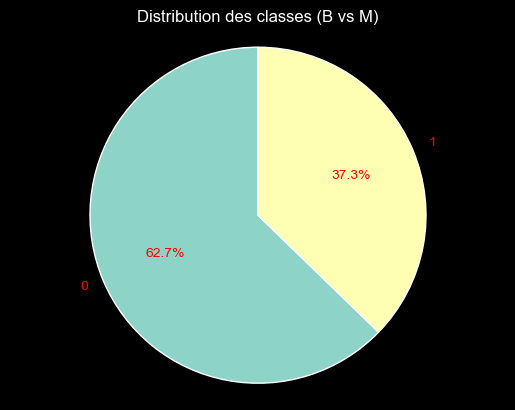

In [3]:
counts = df_clean["diagnosis"].value_counts()

plt.pie(
    counts,
    labels=counts.index,
    autopct="%1.1f%%",
    startangle=90,
    textprops={
        "color": "red",
    }
)

plt.title("Distribution des classes (B vs M)")
plt.axis("equal")
plt.show()

Text(0.5, 1.0, 'Class Distribution (bénin vs malin)')

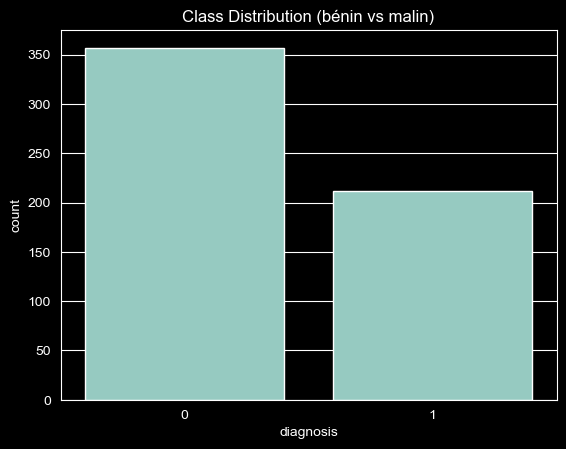

In [4]:
sns.countplot(x='diagnosis', data=df_clean)
plt.title('Class Distribution (bénin vs malin)')

## Matrice de corrélation

On calcule la matrice de corrélation des variables numériques afin d’identifier :

- Les relations linéaires fortes entre variables
- Les risques potentiels de multicolinéarité
- Les groupes de variables redondantes

Une heatmap permet de visualiser l’intensité des corrélations (de -1 à +1).

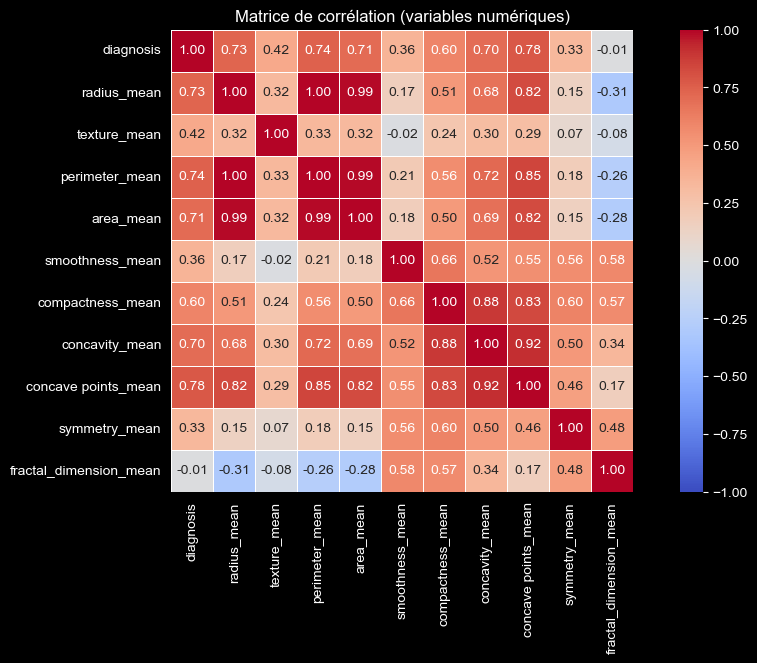

In [5]:
corr = df_clean.select_dtypes(include="number").corr()

plt.figure(figsize=(12, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.5
)
plt.title("Matrice de corrélation (variables numériques)")
plt.show()

### Interprétation

La matrice de corrélation met en évidence de fortes corrélations entre les variables liées à la taille de la tumeur (rayon, périmètre, surface), suggérant une information redondante.

En revanche, les variables décrivant la forme et l’irrégularité semblent apporter une information complémentaire pour la prédiction de la malignité.

Les variables `perimeter_mean`, `concavity_mean` et `compactness_mean` ont été retenues car elles décrivent trois dimensions complémentaires de la tumeur :

- Sa taille
- Son irrégularité
- Sa densité structurelle

Cependant, les corrélations observées suggèrent un risque de multicolinéarité dans un modèle linéaire comme la régression logistique.

## Analyse des relations bivariées

Un pairplot est utilisé pour visualiser :

- La séparation des classes
- Les zones de chevauchement
- Le potentiel discriminant des variables sélectionnées

La coloration par classe (`hue='diagnosis'`) permet d’évaluer visuellement la capacité des variables à distinguer les tumeurs bénignes des tumeurs malignes.

On observe une séparation relativement nette entre les classes, ce qui suggère qu’un modèle de classification linéaire pourrait être performant.

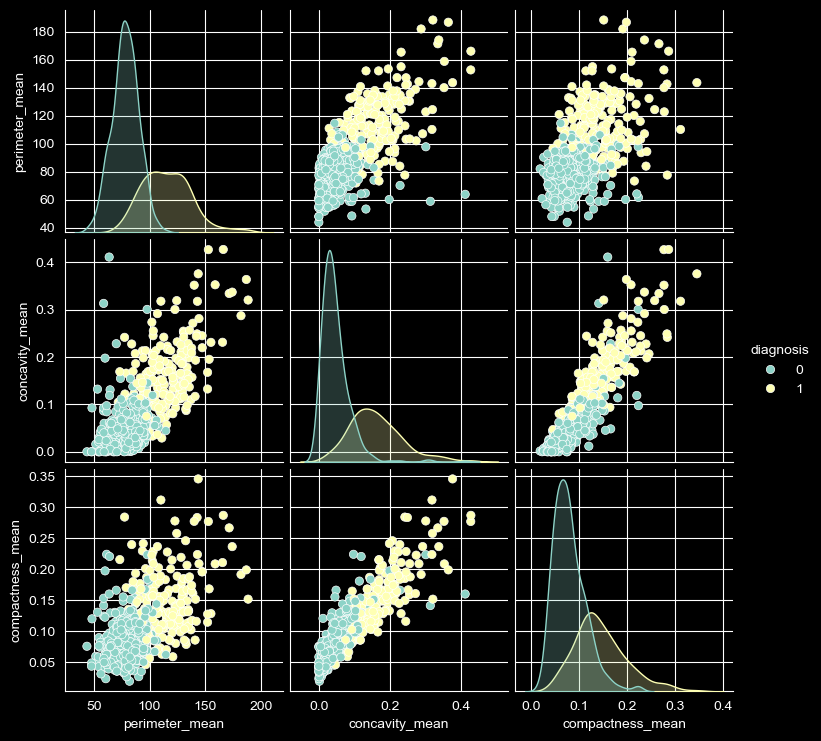

In [6]:
sns.pairplot(df_clean[['perimeter_mean', 'concavity_mean', 'compactness_mean', 'diagnosis']], hue='diagnosis')
